# Work-Life Balance Score

### ML Model to score an individual Work-Personal Life Balance

Following dataset used for training the model is from a survey response (https://www.authentic-happiness.com)

### Import required modules

In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

### Download and Initialize the data

Download dataset from S3 to local directory

Read the CSV file and set display options for analysis

In [4]:
raw_data = pd.read_csv('lifestyle_data.csv')

In [5]:
pd.set_option('display.max_columns',None)
raw_data[40:50]

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
40,7/15/15,4,2,10,8,8,4,6,3,1,5,4,3,2,7,10,1,2,5,4,8,21 to 35,Female,687.3
41,7/15/15,4,3,10,8,10,3,2,3,2,0,0,3,0,5,0,2,2,4,0,2,51 or more,Female,635.9
42,7/15/15,2,3,0,8,10,10,1,2,2,5,0,2,10,9,0,3,1,10,0,10,51 or more,Female,655.2
43,7/15/15,3,2,4,1,1,10,3,2,1,7,5,7,2,7,4,3,1,3,5,8,21 to 35,Male,652.4
44,7/15/15,2,3,3,10,3,4,0,4,1,7,1,8,1,8,0,3,2,2,2,3,36 to 50,Female,657.9
45,7/16/15,3,5,10,2,9,10,5,5,1,10,1,10,10,5,10,7,2,7,2,2,36 to 50,Female,686.6
46,7/16/15,5,3,10,10,10,6,4,5,1,7,4,10,2,6,5,1,2,8,4,10,51 or more,Female,732.7
47,7/16/15,4,2,10,10,5,8,5,2,2,6,3,10,2,8,2,2,1,10,3,7,21 to 35,Female,685.5
48,7/16/15,3,2,8,10,10,10,8,5,2,10,3,7,10,7,1,2,2,10,3,10,51 or more,Female,742.5
49,7/16/15,2,3,3,10,10,10,5,1,2,7,4,2,6,8,0,2,2,4,1,1,36 to 50,Female,663.5


### Exploratory Data Analysis

Understand given dataset and identity relation within them

Check for missing data within the dataset

In [6]:
na_columns = []
for column in raw_data.columns:
    if raw_data[column].isna().sum() > 0:
        na_columns.append(column)

if len(na_columns) == 0:
    print('No Missing Data')

No Missing Data


Drop columns that are not required for analysis

In [7]:
raw_data.drop(columns = 'Timestamp',axis = 1, inplace=True) # Doesn't have direct relation with the 
raw_data.drop(columns=['LIVE_VISION', 'FLOW'], axis=1, inplace=True) # Column details unavailable
raw_data.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,5,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2,3,4,3,8,10,5,2,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2,3,3,4,4,10,3,2,2,2,4,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,3,3,10,3,10,7,2,5,2,3,5,5,7,5,1,5,2,0,51 or more,Female,622.7
4,5,1,3,3,10,4,2,4,2,5,5,7,0,0,2,8,1,5,51 or more,Female,663.9


In [8]:
raw_data.rename(columns={'DAILY_SHOUTING': 'AVERAGE_SHOUTING',
                         'DAILY_STRESS': 'AVERAGE_STRESS',
                         'DAILY_STEPS': 'AVERAGE_DAILY_STEPS'},
                inplace=True)

In [9]:
categorical_columns = [column for column in raw_data.columns if raw_data[column].dtype == 'O']

In [10]:
categorical_columns

['AVERAGE_STRESS', 'AGE', 'GENDER']

In [11]:
numerical_columns = [column for column in raw_data.columns if column not in categorical_columns and column != 'WORK_LIFE_BALANCE_SCORE']

In [12]:
numerical_columns

['FRUITS_VEGGIES',
 'PLACES_VISITED',
 'CORE_CIRCLE',
 'SUPPORTING_OTHERS',
 'SOCIAL_NETWORK',
 'ACHIEVEMENT',
 'DONATION',
 'BMI_RANGE',
 'TODO_COMPLETED',
 'AVERAGE_DAILY_STEPS',
 'SLEEP_HOURS',
 'LOST_VACATION',
 'AVERAGE_SHOUTING',
 'SUFFICIENT_INCOME',
 'PERSONAL_AWARDS',
 'TIME_FOR_PASSION',
 'WEEKLY_MEDITATION']

#### Visualization of Distribution over the features

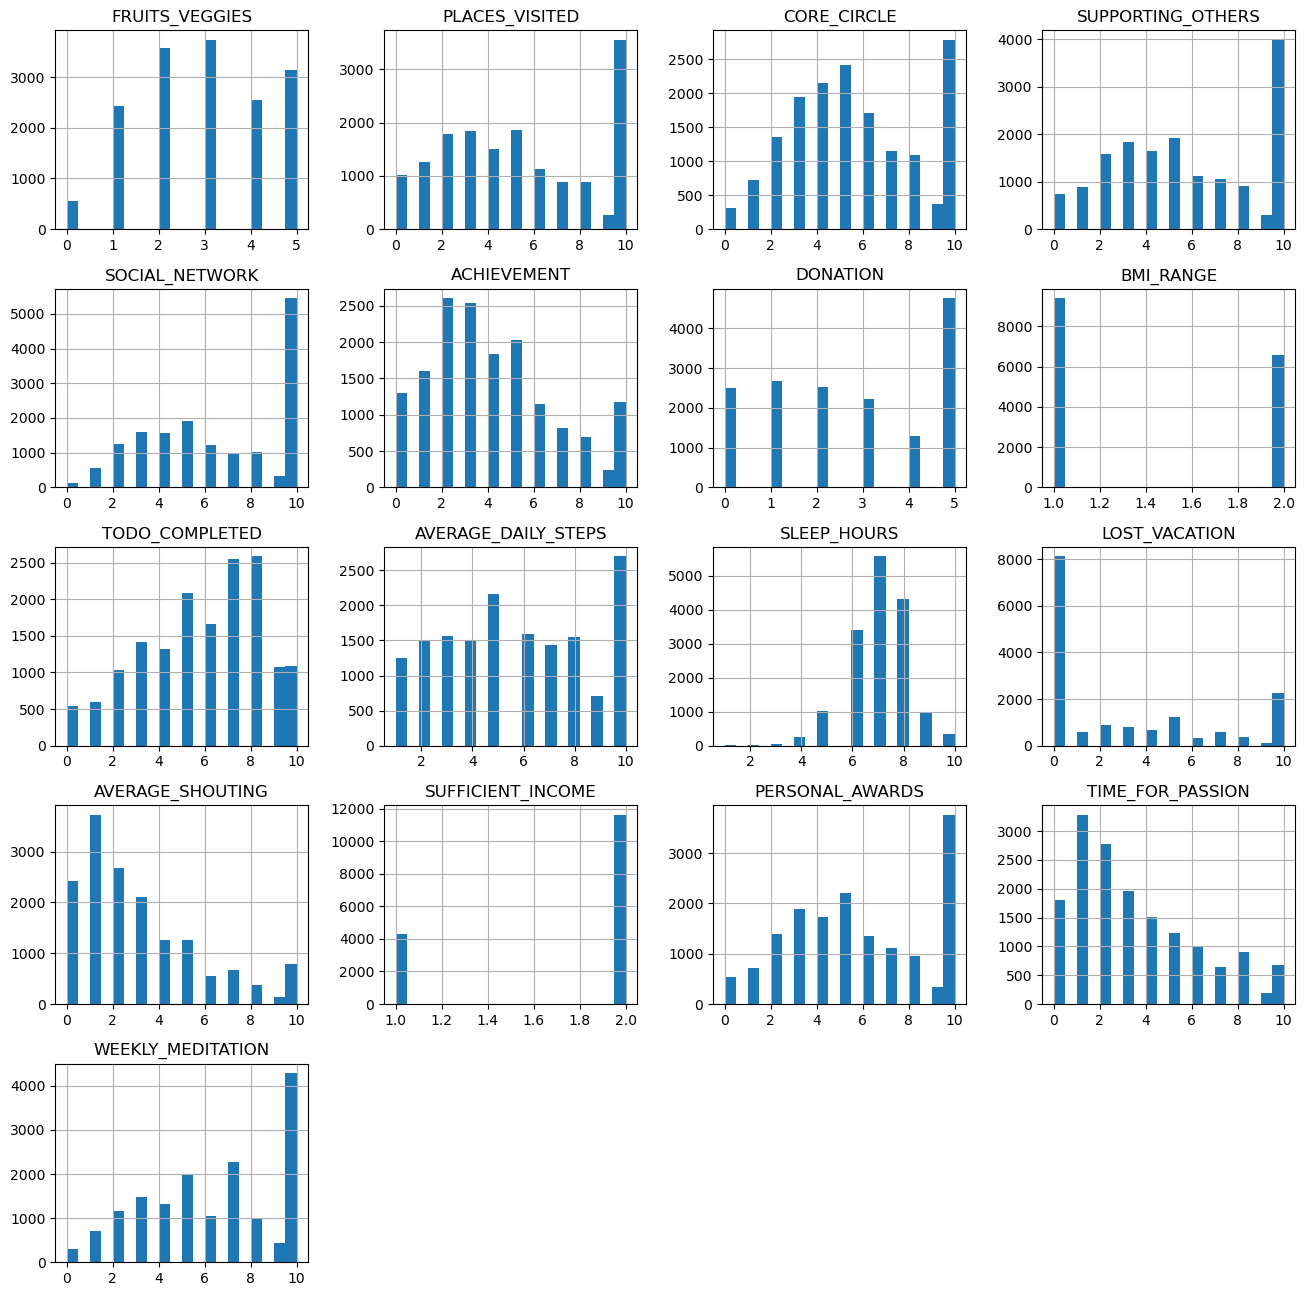

In [13]:
raw_data[numerical_columns].hist(bins=20, figsize=(16,16))
plt.show()

From the distribution we can understand both BMI_RANGE and SUFFICIENT_INCOME can be considered as Catergorical data.

In [14]:
raw_data['BMI_RANGE'] = raw_data.BMI_RANGE.astype('O')
raw_data['SUFFICIENT_INCOME'] = raw_data.SUFFICIENT_INCOME.astype('O')

In [15]:
categorical_columns = [column for column in raw_data.columns if raw_data[column].dtype == 'O']

In [16]:
for column in categorical_columns:
    print(f"Column: {column}\n{raw_data[column].unique()}", end='\n\n')

Column: AVERAGE_STRESS
['2' '3' '1' '4' '5' '0' '1/1/00']

Column: BMI_RANGE
[1 2]

Column: SUFFICIENT_INCOME
[1 2]

Column: AGE
['36 to 50' '51 or more' '21 to 35' 'Less than 20']

Column: GENDER
['Female' 'Male']



In [17]:
raw_data.replace('1/1/00', 'Missing', inplace=True) # Clearing mislabeled data

In [18]:
discrete_columns = [column for column in numerical_columns if len(raw_data[column].unique()) < 20]

In [19]:
discrete_columns

['FRUITS_VEGGIES',
 'PLACES_VISITED',
 'CORE_CIRCLE',
 'SUPPORTING_OTHERS',
 'SOCIAL_NETWORK',
 'ACHIEVEMENT',
 'DONATION',
 'BMI_RANGE',
 'TODO_COMPLETED',
 'AVERAGE_DAILY_STEPS',
 'SLEEP_HOURS',
 'LOST_VACATION',
 'AVERAGE_SHOUTING',
 'SUFFICIENT_INCOME',
 'PERSONAL_AWARDS',
 'TIME_FOR_PASSION',
 'WEEKLY_MEDITATION']

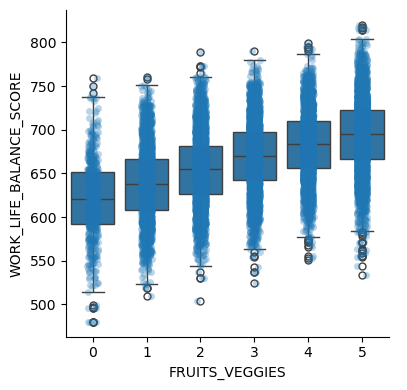

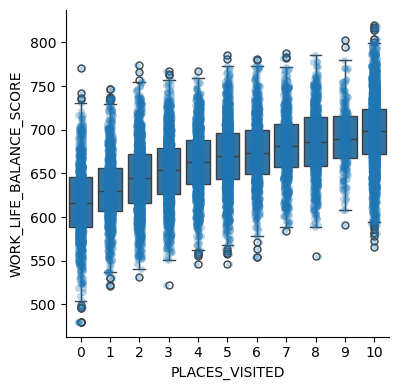

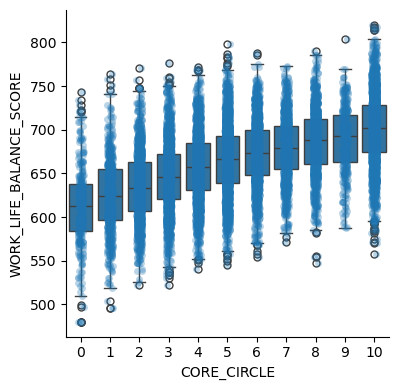

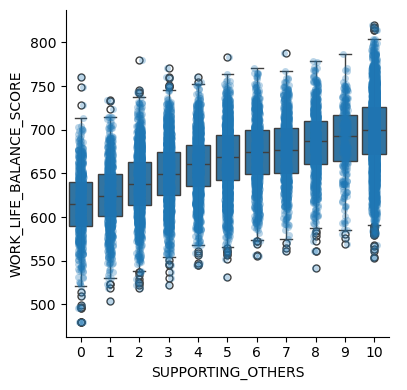

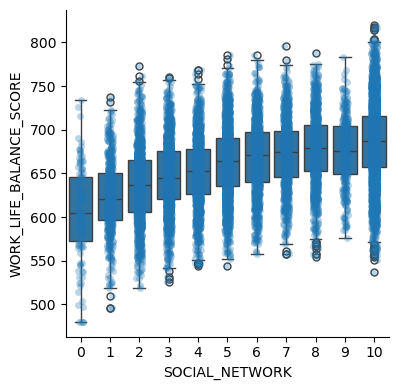

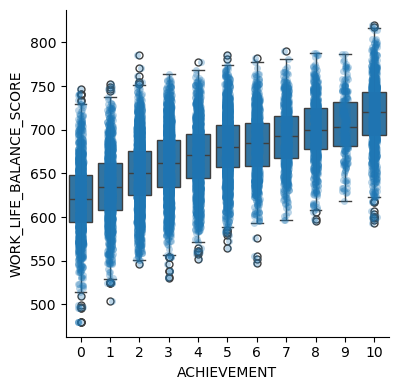

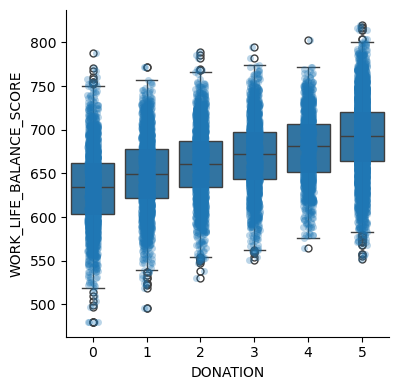

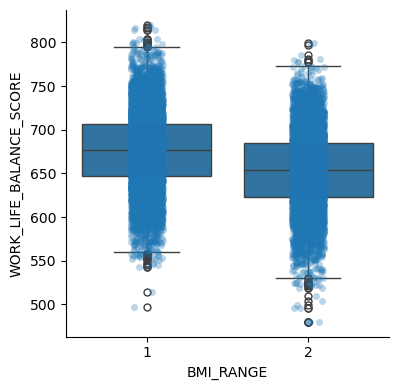

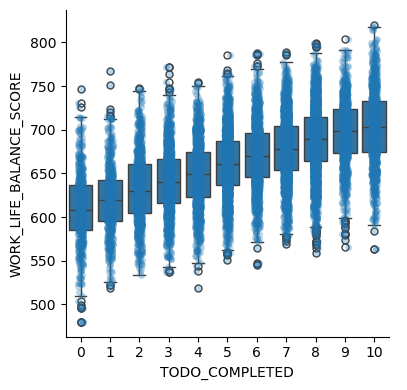

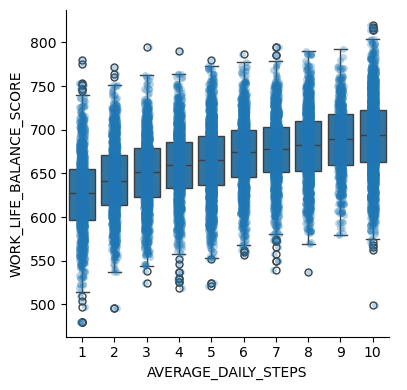

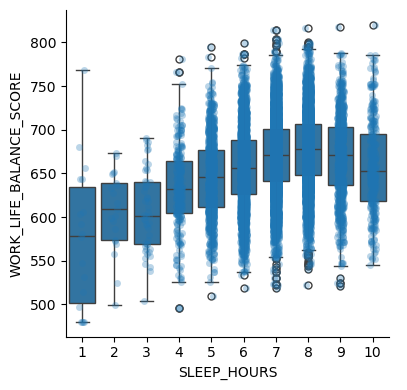

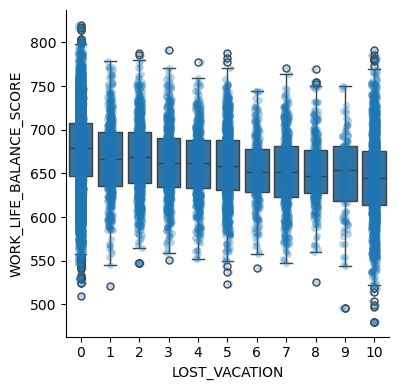

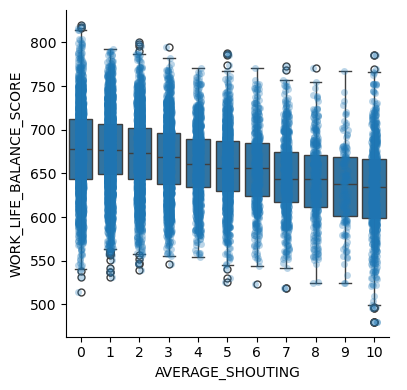

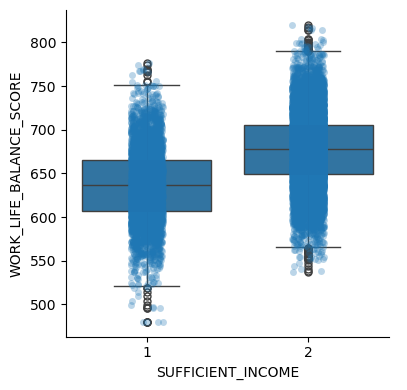

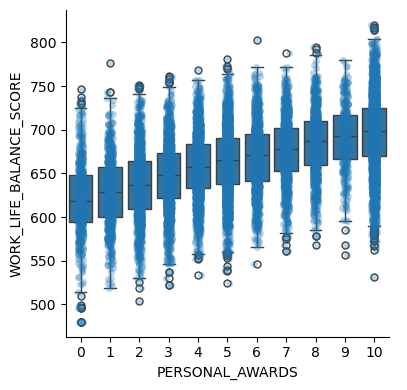

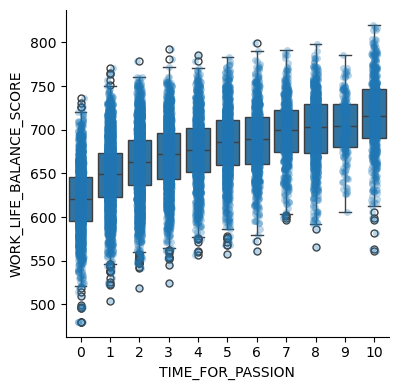

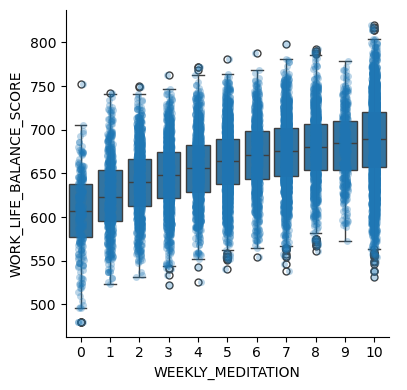

In [20]:
for column in discrete_columns:
    sns.catplot(x = column, y = 'WORK_LIFE_BALANCE_SCORE', data = raw_data, kind='box', height = 4)
    sns.stripplot(x = column, y = 'WORK_LIFE_BALANCE_SCORE', data = raw_data, jitter = 0.1, alpha=0.3)
    plt.show()

In [21]:
data = raw_data.copy()
data.head()

,FRUITS_VEGGIES,AVERAGE_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,AVERAGE_DAILY_STEPS,SLEEP_HOURS,LOST_VACATION,AVERAGE_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,2,5,0,5,2,0,1,6,5,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2,3,4,3,8,10,5,2,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2,3,3,4,4,10,3,2,2,2,4,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,3,3,10,3,10,7,2,5,2,3,5,5,7,5,1,5,2,0,51 or more,Female,622.7
4,5,1,3,3,10,4,2,4,2,5,5,7,0,0,2,8,1,5,51 or more,Female,663.9


### Feature Engineering

In [22]:
from sklearn.model_selection import train_test_split

Split training and test dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('WORK_LIFE_BALANCE_SCORE', axis=1),
    data['WORK_LIFE_BALANCE_SCORE'],
    test_size=0.15, random_state=0)

In [24]:
X_train.shape, X_test.shape

((13576, 20), (2396, 20))

Mark values 'Rare' within the data with very low frequency to avoid rare cases

In [25]:
def value_frequency(df, var, perc):
    df = df.copy()
    temp = df.groupby(var)[var].count() / len(df)
    return temp[temp > perc].index

for column in categorical_columns:
    rare_items = value_frequency(X_train, column, 0.05)
    X_train[column] = X_train[column].where(X_train[column].isin(rare_items), 'Rare')
    X_test[column] = X_test[column].where(X_test[column].isin(rare_items), 'Rare')

In [26]:
for column in categorical_columns:
    print(f"Column: {column}\n{X_test[column].unique()}", end='\n\n')

Column: AVERAGE_STRESS
['3' '1' '4' 'Rare' '2' '5']

Column: BMI_RANGE
[1 2]

Column: SUFFICIENT_INCOME
[2 1]

Column: AGE
['21 to 35' '36 to 50' '51 or more' 'Less than 20']

Column: GENDER
['Male' 'Female']



In [27]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

Ordinal Encoding: Features AVERAGE_STRESS, BMI_RANGE and SUFFICIENT_INCOME all have a measurable values and dependent on each values. Thus ordinal encoding will ensure to keep them in interger format

One Hot Encoding: Features AGE and GENDER are categorical values needed to be encoded to have uniform within the data and to provide a more improvement in performance

MinMaxScaler: Since the dataset contains outliners and those data have a direct relation to the target we utilize MinMaxScaler to normalize the data without reducing the outliers effects.

In [28]:
ordinal_encoding_columns = categorical_columns[:3] # These features required cardinality
one_hot_encoding_columns = categorical_columns[3:] # String categorical features
minmax_scaler_columns = numerical_columns # discrete features

In [29]:
column_transformer = ColumnTransformer(transformers=[
    ('label_encoder', OrdinalEncoder(), ordinal_encoding_columns),
    ('one_hot_encoder', OneHotEncoder(), one_hot_encoding_columns),
    ('minmaxscalar', MinMaxScaler(), minmax_scaler_columns)
    ], remainder='passthrough')

PASS

In [30]:
target_scalar = MinMaxScaler()
y_train = target_scalar.fit_transform(pd.DataFrame(y_train))

In [31]:
y_train

array([[0.55996473],
       [0.47442681],
       [0.24897119],
       ...,
       [0.32921811],
       [0.63051146],
       [0.25455614]])

### Train Model

In [32]:
from sklearn.ensemble import StackingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline

In [33]:
pipeline = Pipeline([('preprossing', column_transformer),
                    ('ensemble', HistGradientBoostingRegressor())])

In [34]:
pipeline.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprossing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label_encoder',
                                                  OrdinalEncoder(),
                                                  ['AVERAGE_STRESS',
                                                   'BMI_RANGE',
                                                   'SUFFICIENT_INCOME']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['AGE', 'GENDER']),
                                                 ('minmaxscalar',
                                                  MinMaxScaler(),
                                                  ['FRUITS_VEGGIES',
                                                   'PLACES_VISITED',
                                                   'CORE_CIRCLE',
                                                   'SUPPORTING_OTHERS',
                                                   'SOCIAL_NETWORK',
                                                   'ACHIEVEMENT', 'DONATION',
                                                   'BMI_RANGE',
                                                   'TODO_COMPLETED',
                                                   'AVERAGE_DAILY_STEPS',
                                                   'SLEEP_HOURS',
                                                   'LOST_VACATION',
                                                   'AVERAGE_SHOUTING',
                                                   'SUFFICIENT_INCOME',
                                                   'PERSONAL_AWARDS',
                                                   'TIME_FOR_PASSION',
                                                   'WEEKLY_MEDITATION'])])),
                ('ensemble', HistGradientBoostingRegressor())])

In [35]:
X_pred = pipeline.predict(X_test)

### Model Evaluation

In [36]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [37]:
print(mean_squared_error(target_scalar.transform(pd.DataFrame(y_test)), X_pred))
print(root_mean_squared_error(target_scalar.transform(pd.DataFrame(y_test)), X_pred))
print(r2_score(target_scalar.transform(pd.DataFrame(y_test)), X_pred))
print(mean_absolute_error(target_scalar.transform(pd.DataFrame(y_test)), X_pred))

0.0005616786773266225
0.023699761123830394
0.9678903506409412
0.01867814501492352


In [38]:
# Learn more about Regression Scoring

In [39]:
X_pre = X_pred.reshape((2396,1))

In [40]:
y_pred = target_scalar.transform(pd.DataFrame(y_test))

In [41]:
y_pred.shape

(2396, 1)

In [55]:
data.groupby(['WORK_LIFE_BALANCE_SCORE']).max().iloc[-2]

FRUITS_VEGGIES                    5
AVERAGE_STRESS                    0
PLACES_VISITED                   10
CORE_CIRCLE                      10
SUPPORTING_OTHERS                10
SOCIAL_NETWORK                   10
ACHIEVEMENT                      10
DONATION                          5
BMI_RANGE                         1
TODO_COMPLETED                   10
AVERAGE_DAILY_STEPS              10
SLEEP_HOURS                       9
LOST_VACATION                     0
AVERAGE_SHOUTING                  0
SUFFICIENT_INCOME                 2
PERSONAL_AWARDS                  10
TIME_FOR_PASSION                 10
WEEKLY_MEDITATION                10
AGE                    Less than 20
GENDER                         Male
Name: 818.3, dtype: object

In [42]:
from sklearn.metrics import PredictionErrorDisplay

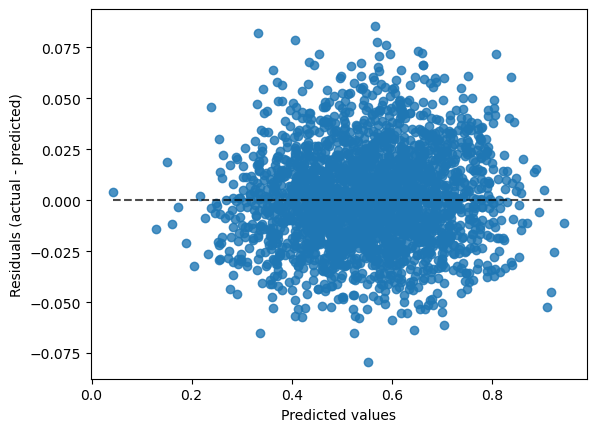

In [43]:
display = PredictionErrorDisplay(y_pred=X_pre, y_true=y_pred)
display.plot()

In [44]:
from sklearn.inspection import permutation_importance

In [45]:
feature_importance = permutation_importance(pipeline, X_train, y_train, n_repeats=10)

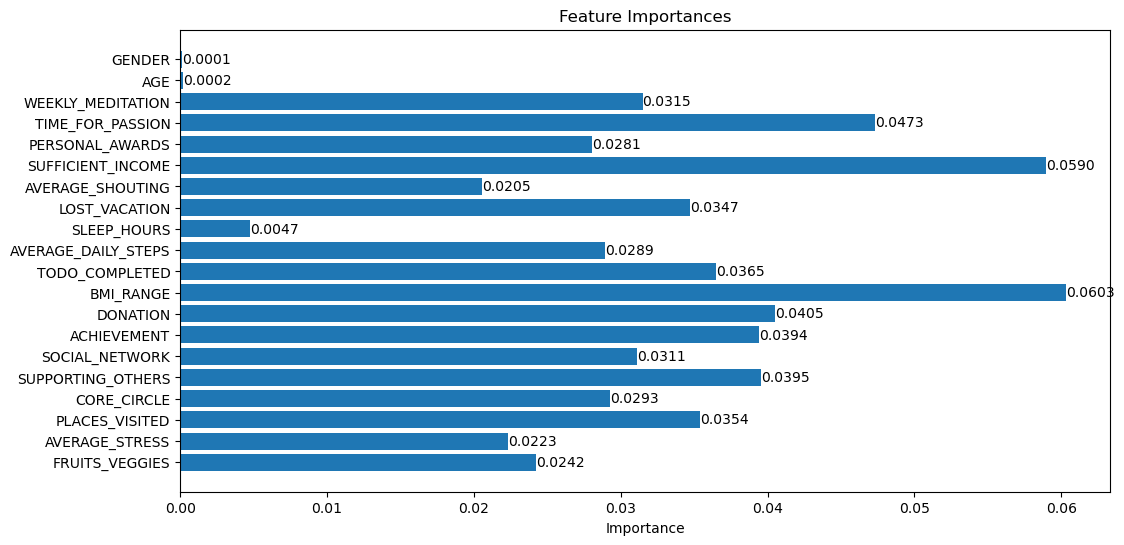

In [46]:
feature_names = pipeline.named_steps['preprossing'].feature_names_in_

# Access feature importances from the trained Model
feature_importances = feature_importance.importances_mean

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Plotting the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
for index, value in enumerate(feature_importances):
    value_text = '{:.4f}'.format(value)
    plt.text(value, index, value_text, ha='left', va='center', fontsize=10, color='black')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()